## Иследование самокатов GoFast и прверка статистичеких гипотез##
В этом проекте мы рассмотрим самокаты GoFast которые часто ипользутся в больших городах России и рассмотрим их более подробно.

Цель иследования: 

Провести гипотезы по клиентам с подпиской и без подписки и выяснить какие из них более прибыльные для комании

1 Для начала разгрузим данные которые нам дали в них входит три файла

2 После чего сделаем предобработку данных и проверим данныхе на наличие дубликатов

3 Рассмотрим данных подробней и визуализируем некоторые столбцы чтобы было визуальное понимание

4 так как у нас три датафрейма лучше будет работать не с каждым по отдельности а все вместе, поэтому мы объеденим все данные таблицы 

5 В этом шаге мы подсчитаем выручку за каждый месяц чтобы было понимаение разницы между клиентов с подпиской и без подписки 

6 Рассмотрим 4 гипотезы которые больше всего концентрированы на разницу между клиентами с подпиской и без подписки

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from math import sqrt
import matplotlib.pyplot as plt

#### Шаг 1. Загрузка данных

In [2]:
user = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscription = pd.read_csv('/datasets/subscriptions_go.csv')

разгрузили нужные данных

In [3]:
display(user.head())
display(rides.head())
display(subscription.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [4]:
user.info()
rides.info()
subscription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Col

Просматриваем данные для общего понимания с чем мы будем работать

Можем заметить разницу в кол-ве строк что говорит о том что когда мы будем совмещать столбцы кол-во строк увеличиться с 1565 до 18068

Также можем заметить что колонка 'date' является типом object соответсветнно мы должны поменять его на время 

#### Шаг 2. Предобработка данных

In [5]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides['date']

0       2021-01-01
1       2021-01-18
2       2021-04-20
3       2021-08-11
4       2021-08-28
           ...    
18063   2021-11-04
18064   2021-11-16
18065   2021-11-18
18066   2021-11-27
18067   2021-12-29
Name: date, Length: 18068, dtype: datetime64[ns]

Переводим формат во временой

In [6]:
rides['month_num'] = rides['date'].dt.month
rides['month_num'].head()

0    1
1    1
2    4
3    8
4    8
Name: month_num, dtype: int64

также создаем отдельный столбец нумерации месяца чтобы в дальнейшем расчитывать доход именно по месяцам

In [7]:
rides_date_month = pd.DataFrame(rides, columns = ['date', 'month_num'])
display(rides_date_month.head(10))
display(rides_date_month.tail(10))

,date,month_num
0,2021-01-01,1
1,2021-01-18,1
2,2021-04-20,4
3,2021-08-11,8
4,2021-08-28,8
5,2021-10-09,10
6,2021-10-19,10
7,2021-11-06,11
8,2021-11-14,11
9,2021-11-22,11


,date,month_num
18058,2021-06-11,6
18059,2021-06-18,6
18060,2021-08-08,8
18061,2021-08-20,8
18062,2021-09-13,9
18063,2021-11-04,11
18064,2021-11-16,11
18065,2021-11-18,11
18066,2021-11-27,11
18067,2021-12-29,12


In [8]:
rides['date'].dt.year.unique()

array([2021])

In [9]:
print(user.duplicated().sum())
print(rides.duplicated().sum())

31
0


находим явные дубликаты 

In [10]:
user = user.drop_duplicates()

In [11]:
print(user['user_id'].duplicated().sum())

0


убрали явные дубликаты

In [12]:
print(user.isna().sum())
print(rides.isna().sum())
subscription.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
user_id      0
distance     0
duration     0
date         0
month_num    0
dtype: int64


subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Можем увидить что во всех трех дата фреймах у нас отсутствуют дубликаты. Можем не считать последний дата фрейм так как в нем всего две строчки.

#### Шаг 3. Исследовательский анализ данных

Text(0, 0.5, 'Частота')

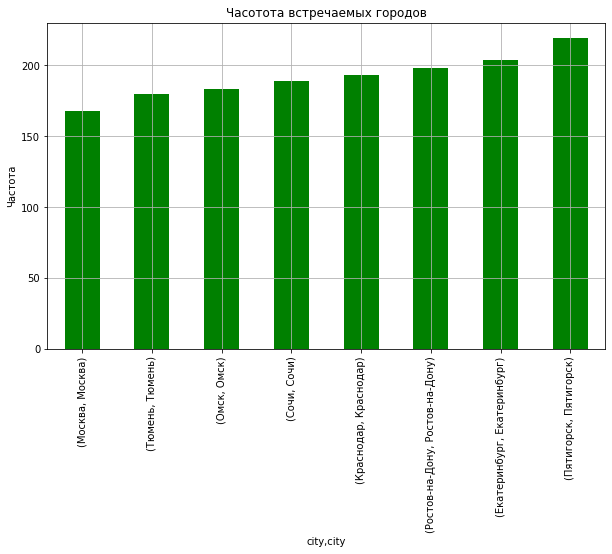

In [13]:
user_group = user.groupby('city')['city'].value_counts(ascending = True).sort_values().plot(y='city', kind = 'bar', figsize = (10, 6),grid = True,color = 'green', title = 'Часотота встречаемых городов')
plt.ylabel('Частота') 


Можем заметить что больше всего используют эти самокаты в городе Пятегорск а меньше всего что очень странно Москва, 

Соотношение подписки "ultra" c общим кол-вом (в процентах): 45.56714471968709
Соотношение подписки "free" c общим кол-вом (в процентах): 54.43285528031291


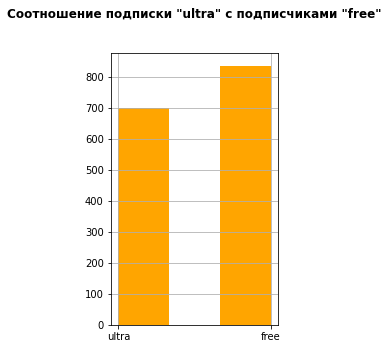

In [14]:
user['subscription_type'].hist(figsize = (3, 5), bins = 3, color = 'orange', histtype = 'barstacked')
plt.title('Соотношение подписки "ultra" c подписчиками "free"\n\n', fontweight = "bold")
#title = 'Соотношение подписки "ultra" c подписчиками "free"'
#user['subscription_type'].set_title(title)
ultra_percent = user[user['subscription_type'] == 'ultra'].count() / user['subscription_type'].count()
print(f'Соотношение подписки "ultra" c общим кол-вом (в процентах):', ultra_percent['name'] * 100)
print(f'Соотношение подписки "free" c общим кол-вом (в процентах):', 100 - (ultra_percent['name'] * 100))

Cравнили соотношение пользователей с подпиской и без подписки. Пользователей с подпиской немного меньше, тем не менее у компании-прокатчика есть неплохая база постоянных клиентов. Вывод: пользователей без подписки больше но разница незначительная 

<AxesSubplot:title={'center':'График частоты использования самокатов по возрасту'}, ylabel='age'>

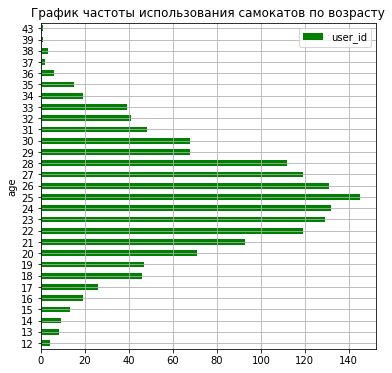

In [15]:
#user['age'].hist(bins = 30)
user_age = user.groupby('age').count()
user_age.plot(y = 'user_id', kind = 'barh', grid = True, figsize = (6, 6), color = 'green', title = 'График частоты использования самокатов по возрасту')


Наша целевая аудитория в возрасте от 22 до 28 из них больше всего пользуются клиенты возрасте 25 лет. Можно также отметить что это нормальное распределение. Все что меньше 15 лет и больше 40 можно считать редкими значениями.

Text(0.5, 1.0, 'Распределение по времени поездки\n\n')

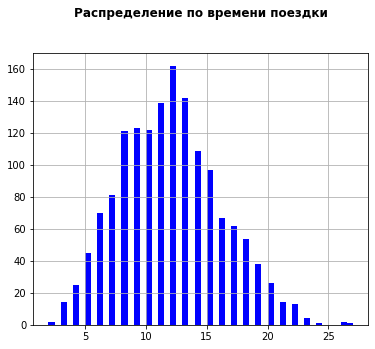

In [16]:
rides_group = rides.groupby('user_id')['duration'].count()
rides_group.hist(bins = 50, color = 'blue', figsize = (6, 5))
plt.title('Распределение по времени поездки\n\n', fontweight = "bold")
#rides_group.plot(x = 'duration', y = 'duration', kind = 'scatter', figsize = (8, 10))
#rides_group.plot.bar()

Среднее время поездки на самокате от 8 до 15 минут, в среднем 12 минут 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f36fc9ce3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f36fc9ceac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f36fc9ce070>],
 'medians': [<matplotlib.lines.Line2D at 0x7f36fc9da1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f36fc9da520>],
 'means': []}

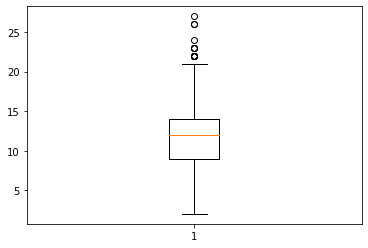

In [17]:
plt.boxplot(rides_group)

Здесь мы можем сказать что данные которые не стоит учитывать находяться свыше 22 

Text(0.5, 1.0, 'Распределение по времени поездки\n\n')

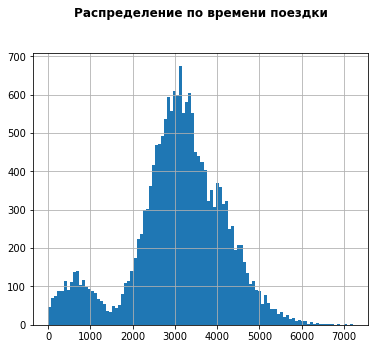

In [18]:
rides['distance'].hist(bins = 100, figsize = (6, 5))
plt.title('Распределение по времени поездки\n\n', fontweight = "bold")

здесь мы можем заметить два пика а именно на 600 метрах (пик не значительный) и также на 3200 метрах. Основная часть поездок занимает от 2500 до 3800 метров. Медиана 3133 метра. Поездки на расстояние более 5 км редки. Однако на гистограмме видно, что некоторая часть пользователей использует самокаты для коротких поездок - до 1500 м.

#### Шаг 4. Объединение данных

In [19]:
print("Размеры результирующего датафрейма до изменения (user):", user.shape)
print("Размеры результирующего датафрейма до изменения (rides):", rides.shape)

Размеры результирующего датафрейма до изменения (user): (1534, 5)
Размеры результирующего датафрейма до изменения (rides): (18068, 5)


In [20]:
user_rides = user.merge(rides, on='user_id', how='left')
user_rides_sub = user_rides.merge(subscription, on='subscription_type', how='left')
user_rides_sub.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_num,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [21]:
print("Размеры результирующего датафрейма до изменения (user):", user.shape)
print("Размеры результирующего датафрейма до изменения (rides):", rides.shape)
print("Размеры результирующего датафрейма после изменения (user_rides_sub):", user_rides_sub.shape)

Размеры результирующего датафрейма до изменения (user): (1534, 5)
Размеры результирующего датафрейма до изменения (rides): (18068, 5)
Размеры результирующего датафрейма после изменения (user_rides_sub): (18068, 12)


Можем заметить изменение кол-ва столбцов которое в новом объединении равен 12 а кол-во строк равно кол-ву строк дата фрейма "rides"

In [22]:
with_sub = user_rides_sub.query('subscription_type == "ultra"')
without_sub = user_rides_sub.query('subscription_type == "free"')
display(with_sub.head())
display(without_sub.head())
display(user_rides_sub.head())
display(user_rides_sub.tail())

,user_id,name,age,city,subscription_type,distance,duration,date,month_num,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,month_num,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


,user_id,name,age,city,subscription_type,distance,duration,date,month_num,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,month_num,minute_price,start_ride_price,subscription_fee
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0
18067,1534,Альберт,25,Краснодар,free,2371.711192,15.893917,2021-12-29,12,8,50,0


создали два таблицы. одна с клинтами с подпиской и во второй таблицы без подписки

Text(0, 0.5, 'Частота')

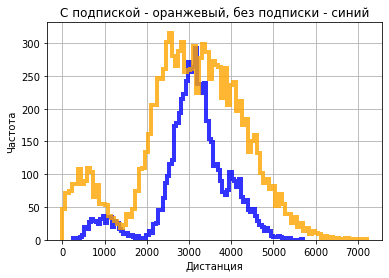

In [23]:
with_sub.distance.plot(grid = True,  kind = 'hist',alpha=0.8,histtype = 'step', bins = 100, title = 'С подпиской - оранжевый, без подписки - синий', linewidth = 4, color = 'blue')
without_sub.distance.plot(grid = True, kind = 'hist',alpha=0.8, histtype = 'step', bins = 100, linewidth = 4, color = 'orange')
plt.xlabel('Дистанция')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

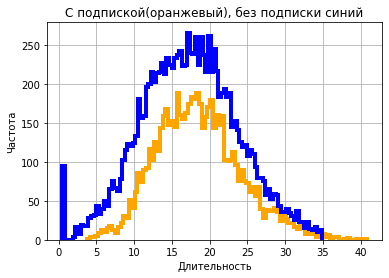

In [24]:
with_sub.duration.plot(grid = True, kind = 'hist', bins = 100,histtype = 'step', linewidth = 4, color = 'orange')
without_sub.duration.plot(grid = True, kind = 'hist', bins = 100, title = 'С подпиской(оранжевый), без подписки синий',histtype = 'step', linewidth = 4, color = 'blue')
plt.xlabel('Длительность')
plt.ylabel('Частота')


Если сранивать эти два графика мы можем невооруженным главзом увидить разницу между в общем кол-ве поездок, у клиентов без подписки их больше но дистнция которую они проежают меньше. Также если разглядывать локальный максимум слева то можем заметить что у клиентов с подпиской он находиться в диапозоне от 900 до 1200 в то время как у клиентов без подписки он находиться с диапозоне от 300 до 800 метров. Что касается правого локального максимума то мы можем заметить явный пик на графике клиентов с подпиской, у них это от 3000 до 3200 метров в то время как у клиентов без подписки это от 2300 до 3500

У пользователей без подписки значительно больше коротких поездок - до 1 км и в целом максимальная дальность поездки выше, чем у платных пользователей.

Касательно времени поездки

Text(0, 0.5, 'Дистанция')

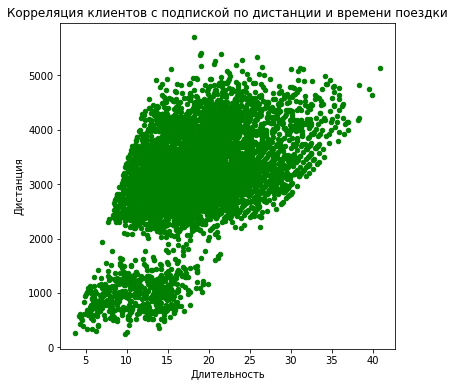

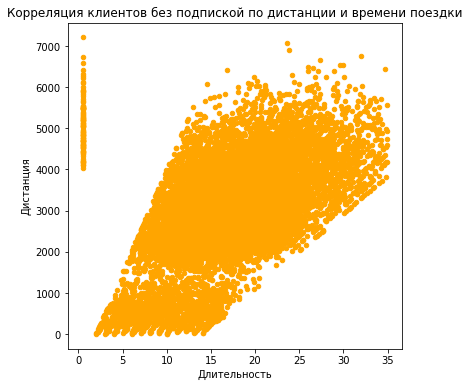

In [25]:
with_sub.plot(kind = 'scatter', x = 'duration', y = 'distance', figsize = (6,6), color = 'green', title = 'Корреляция клиентов с подпиской по дистанции и времени поездки')
plt.xlabel('Длительность')
plt.ylabel('Дистанция')
without_sub.plot(kind = 'scatter', x = 'duration', y = 'distance', figsize = (6,6), color = 'orange', title = 'Корреляция клиентов без подпиской по дистанции и времени поездки')
plt.xlabel('Длительность')
plt.ylabel('Дистанция')


В целом можем заметить что клиенты без подписки тратят больше времени на поездку и соответственно проезжают дистанцию больше чем клиенты без подписки. Также можем заметить что есть аномалии у клиентов без подписки за одну минуту они проезжают дистанцию от 4000 до 6800 метров

#### Шаг 5. Подсчёт выручки

In [26]:
user_rides_sub.duplicated().sum()

0

У меня возник один вопрос, почему мы каждый раз проверяем столбцы на пропуски?

In [27]:
rides['duration'] = np.ceil(rides['duration']) 
user_rides_sub['duration'] = np.ceil(user_rides_sub['duration']) 
agg_df = user_rides_sub.groupby(['user_id', 'month_num']).agg({
    'distance': ['sum', 'count'],
    'duration': 'sum',
    'subscription_type':'first',
    'minute_price':'first', 
    'start_ride_price':'first',
    'subscription_fee':'first'
}).reset_index()

agg_df.columns = ['user_id', 'month_num', 'sum_distance', 'count_rides', 'sum_duration',
                         'subscription_type', 'minute_price',
                         'start_ride_price', 'subscription_fee']

agg_df.reset_index(inplace=True)


In [28]:
agg_df.isna().sum()

index                0
user_id              0
month_num            0
sum_distance         0
count_rides          0
sum_duration         0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [29]:
decimals = 2    
agg_df['sum_duration'] = agg_df['sum_duration'].apply(lambda x: round(x, decimals))
def monthly_revenue(row):
    return row['start_ride_price'] * row['count_rides'] + row['minute_price'] * row['sum_duration'] + row['subscription_fee']
 
agg_df['monthly_revenue'] = agg_df.apply(monthly_revenue, axis=1)


Создали еще один столбец с расчетом прибыли по месяцу

In [30]:
agg_df.head()

,index,user_id,month_num,sum_distance,count_rides,sum_duration,subscription_type,minute_price,start_ride_price,subscription_fee,monthly_revenue
0,0,1,1,7027.511294,2,42.0,ultra,6,0,199,451.0
1,1,1,4,754.159807,1,7.0,ultra,6,0,199,241.0
2,2,1,8,6723.470560,2,46.0,ultra,6,0,199,475.0
3,3,1,10,5809.911100,2,32.0,ultra,6,0,199,391.0
4,4,1,11,7003.499363,3,56.0,ultra,6,0,199,535.0


#### Шаг 6. Проверка гипотез

H0: with_subscription_duration = withuot_subscription_duration

H1: with_subscription_duration > withuot_subscription_duration

In [31]:
#1
ultra_data = pd.DataFrame(with_sub, columns = ['duration'])
ultra_data = ultra_data.dropna()
display(ultra_data.head())
free_data = pd.DataFrame(without_sub, columns = ['duration'])
free_data = free_data.dropna()
free_data.head()                                               

,duration
0,25.599769
1,15.816871
2,6.232113
3,18.511000
4,26.265803


,duration
6500,14.944286
6501,16.234663
6502,20.016628
6503,9.782872
6504,17.427673


In [32]:
alpha = 0.05
result = st.ttest_ind(ultra_data, free_data, alternative = 'greater')
print('P-value:', result.pvalue)
if result.pvalue < alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('принимаем нулевую гипотезу')
    
print('среднее потраченное время с подпиской:', ultra_data.mean())
print('среднее потраченное время без подпиской:', free_data.mean())

P-value: [1.28040983e-34]
отвергаем нулевую гипотезу
среднее потраченное время с подпиской: duration    18.541985
dtype: float64
среднее потраченное время без подпиской: duration    17.390909
dtype: float64


пользователи с подпиской тратят больше времени на поездки чем пользователи без подписки что мы можем видить по итогам гипотезы а также по средним значениям 

In [33]:
#2
distance_value = 3130
alpha = 0.05

distance_data = pd.DataFrame(with_sub, columns = ['distance'])
distance_data = distance_data.dropna()
distance_data.head()

,distance
0,4409.919140
1,2617.592153
2,754.159807
3,2694.783254
4,4028.687306


In [34]:
result = st.ttest_1samp(distance_data, distance_value, alternative = 'greater')
print('P-value:', result.pvalue)
if result.pvalue < alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('принимаем нулевую гипотезу')
print('средняя дистанция:', distance_data.mean())

P-value: [0.91953688]
принимаем нулевую гипотезу
средняя дистанция: distance    3115.445388
dtype: float64


В этом случае мы отклоняем гипотезу о том что среднее  больше 3130, поэтому мы принимаем нулевую гипотезу которая гласит о том что среднее расстояние истинного равно расстоянию которое дано с точки зрения среднего износа самоката

H0: 3130 = mean

H1: 3130 > mean

H0: with_sub_monthly_revenue = without_sub_monthly_revenue

H1: with_sub_monthly_revenue > without_sub_monthly_revenue

In [35]:
#3
with_sub_new = agg_df.query('subscription_type == "ultra"')
with_sub_new = pd.DataFrame(with_sub_new, columns = ['monthly_revenue'])
without_sub_new = agg_df.query('subscription_type == "free"')
without_sub_new = pd.DataFrame(without_sub_new, columns = ['monthly_revenue'])
display(with_sub_new.head())
display(without_sub_new.head())

,monthly_revenue
0,451.0
1,241.0
2,475.0
3,391.0
4,535.0


,monthly_revenue
4533,170.0
4534,962.0
4535,202.0
4536,178.0
4537,332.0


In [36]:
alpha = 0.05
resultt = st.ttest_ind(with_sub_new, without_sub_new, alternative = 'greater')
print('P-value:', resultt.pvalue)
if result.pvalue < alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('принимаем нулевую гипотезу')
    
print('средние затраты пользовтелей с подпиской:', with_sub_new.mean())
print('средние затраты пользовтелей без подпиской:', without_sub_new.mean())

P-value: [1.88503944e-31]
принимаем нулевую гипотезу 1
средние затраты пользовтелей с подпиской: monthly_revenue    362.792191
dtype: float64
средние затраты пользовтелей без подпиской: monthly_revenue    328.641365
dtype: float64


в этом случае мы  отклоняем гипотезу о том что пользователи с подпиской тратят больше денег в месяц тем пользователи без. 
Выходит что нет, хотя мы можем увидить достаточно большую разницу между (примерно 37 рублей) это произошло скорее всего из-за большого стандартного отклоенения

#4
Две зависимые выборки (парные). Будем проводить гипотезу о равенстве среднего значения генеральной выборки до и после изменения. Такой тест проводиться когда происходит изменение в тех же данных при этом кол-во (n) данных не изменияется. Для решения потребуется тест на равенство средних для зависимых выборок, до и после изменений.>